In [5]:
%pylab inline
from io import BytesIO
import IPython.display
import hashlib
import struct

from svgpathtools import * 
import centercurve
import patterntools
import cmath

Populating the interactive namespace from numpy and matplotlib


/home/redhog/Projects/beta/InfiniteGlass/build/env/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['imag', 'real']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [22]:
paths, attributes = svg2paths('base.svg')
decorations = []
for i in range(1, 7):
    ipaths, iattributes = svg2paths('d%s.svg' % i)
    decorations.append(ipaths)    

In [23]:
def decorate(pth,
             decorations,
             padding = 5,
             nitems = 40,
             minsize=0.3,
             overlap=0.02,
             flavor = b'firepower2',
             scaling = lambda d: 1-1/(1+e**(-200*abs(d)+3)),
             include_pth=True):

    bottoms = [[p.scaled(1.,-1.) for p in top] for top in decorations]
    
    bases_bottom = [[path.scale(p, 0.5) for p in bottom] for bottom  in bottoms]
    bases_bottom = [[path.translate(p, -bbox[0]-bbox[3]*1j) for p in base]
                    for base, bbox in ((base, paths2svg.big_bounding_box(base)) for base in bases_bottom)]

    bases_top = [[path.scale(p, 0.5) for p in bottom] for bottom  in decorations]
    bases_top = [[path.translate(p, -bbox[0]-bbox[2]*1j) for p in base]
                    for base, bbox in ((base, paths2svg.big_bounding_box(base)) for base in bases_top)]

    m = hashlib.md5()

    points = [(T,
               pth[s].point(t),
               cmath.phase(pth[s].unit_tangent(t)) * 360 / (2*pi),
               pth[s].normal(t),
               d
              )
              for T, (s, t), d in ((T, pth.T2t(T), pth.derivative(T, 2)) for T in patterntools.nonlinspace(0, 1, nitems, flavor))]

    points = [points[i]
              for i in range(len(points))
              if i == 0 or (abs(points[i][0]-points[i-1][0]) * (360-abs(points[i][2]-points[i-1][2]))/360. > overlap)]

    opaths=[base.scaled(scaling(d)).rotated(a if T > .5 else a + 180, 0.0).translated(p).translated(padding*n)
            for idx, (T, p, a, n, d) in enumerate(points)
            for base in (bases_bottom[idx % len(bases_bottom)] if T > .5 else bases_top[idx % len(bases_top)])
            if scaling(d) > minsize]

    if include_pth:
        opaths.append(pth)

    return opaths


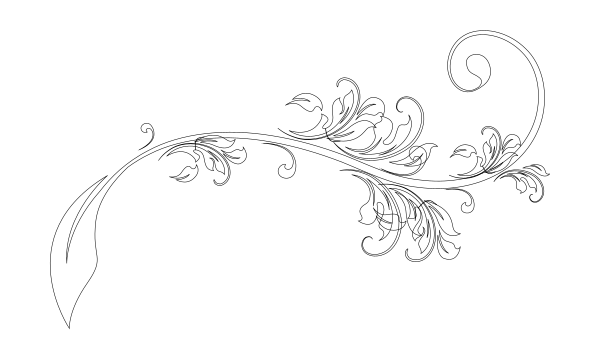

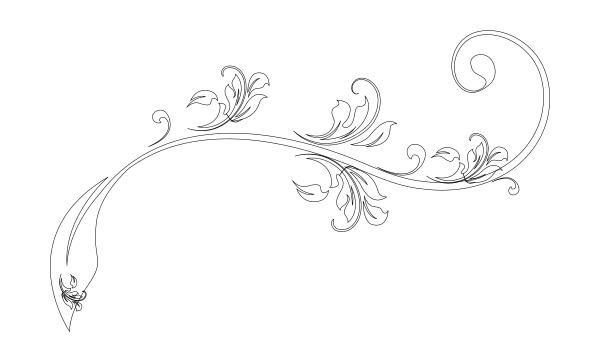

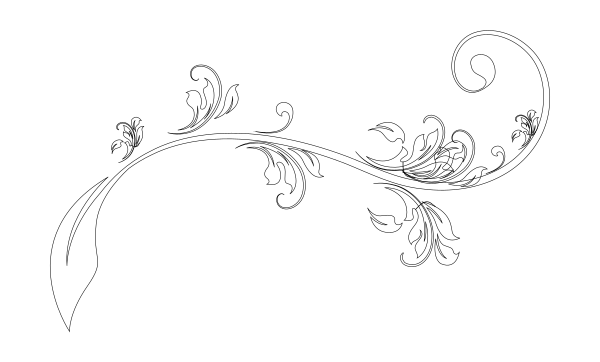

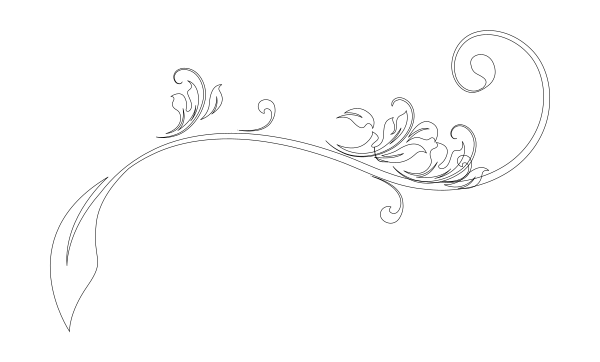

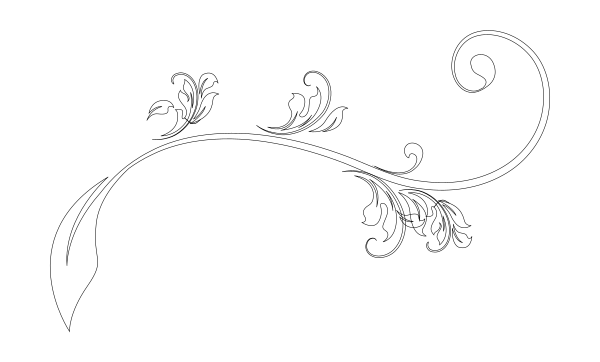

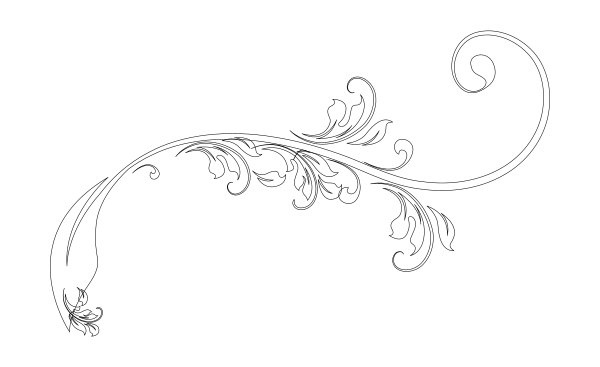

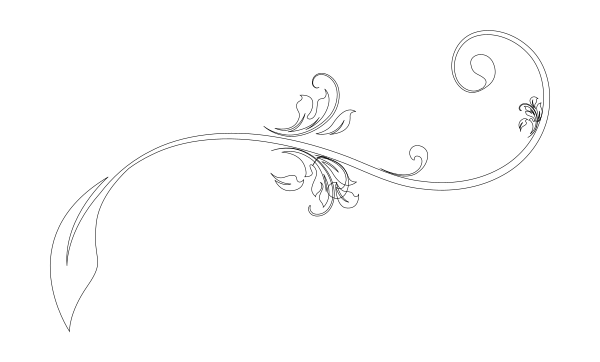

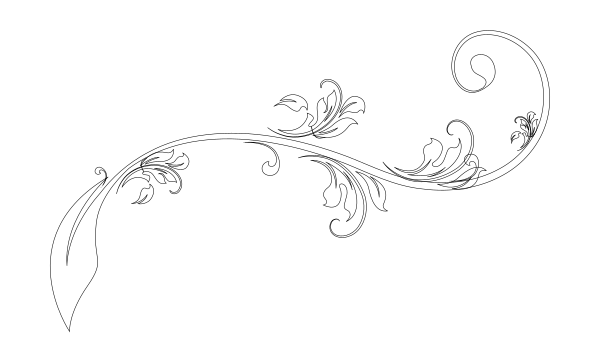

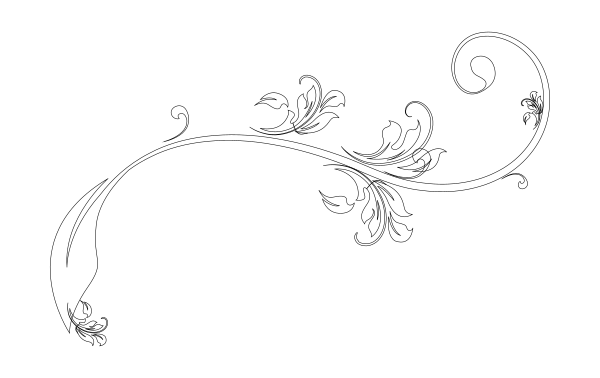

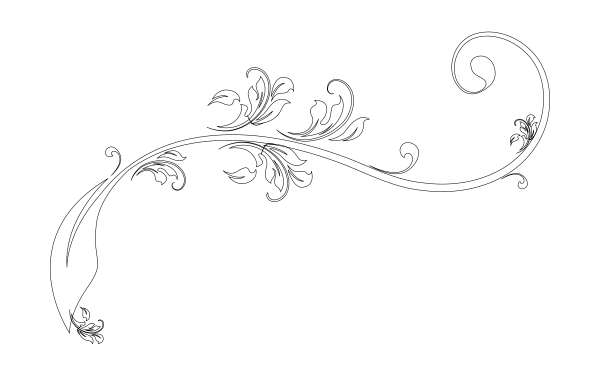

In [24]:
for flavor in range(10):
    patterntools.displaysvg(decorate(paths[0], tops, flavor=str(flavor).encode("UTF-8")), filename="test.svg")


In [ ]:
for flavor in range(10):
    wsvg(decorate(paths[0], bottoms, tops, flavor=str(flavor).encode("UTF-8")), filename="test.svg")
    with open("test.svg", "rb") as f:
        data = f.read()
    IPython.display.display(IPython.display.SVG(data=data))

In [8]:
cs = centercurve.centercurve(paths[0])
cs = sorted(cs, key=lambda p: p.length())

In [10]:
c = cs[-1]

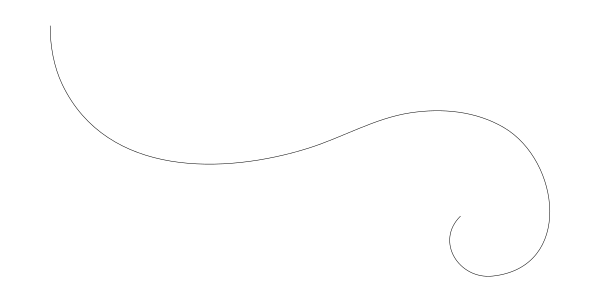

In [17]:
patterntools.displaysvg(c.scaled(1., -1.))